In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Načtení dat ze souboru CSV v podadresáři 'data'
data = pd.read_csv('data/world_bank_indicators.csv')
# Shrnutí dat a seznam názvů sloupců
print("Souhrn dat:")
print(data.describe())
print("\nSeznam názvů sloupců:")
print(list(data.columns))



Souhrn dat:
               year  Access to electricity (% of population)  \
count  16960.000000                              7611.000000   
mean    1991.500000                                81.045979   
std       18.473498                                28.546144   
min     1960.000000                                 0.533899   
25%     1975.750000                                69.653940   
50%     1991.500000                                98.400000   
75%     2007.250000                               100.000000   
max     2023.000000                               100.000000   

       Adjusted net savings, including particulate emission damage (% of GNI)  \
count                                        5429.000000                        
mean                                            7.793301                        
std                                            11.557922                        
min                                          -166.127193                        
25%   

In [3]:
from definitions import FuzzyRelations
from definitions import models
from definitions import models as md
from definitions import quantifiers
import openpyxl

from importlib import reload  # Python 3.4+
FuzzyRelations = reload(FuzzyRelations)
models = reload(models)
quantifiers = reload(quantifiers)
X = data['GDP per capita (current US$)']
Y = data['Fertility rate, total (births per woman)']

# Remove NaN rows
mask = pd.notnull(X) & pd.notnull(Y)
X = X[mask]
Y = Y[mask]

# read data
datax=X
datavalx=Y
# Remove NaN rows
mask = pd.notnull(datax) & pd.notnull(datavalx)
datax = datax[mask]
datavalx = datavalx[mask]

# set declination of fuzzy sets
decl=5
# set numbers (-1) of fuzzy sets on X,Y, respectively
nrules=10
# generate model from data for internaly set discretization 100 and create plots
ModelQuantifiedRules=md.QRules_model(datax,datavalx,nrules,decl)


## Plot and Save the Model

In [4]:
models = reload(models)

md.plot_and_save_QModel(ModelQuantifiedRules, filename_base="my_model")

{'plot_file': 'my_model_plot.png', 'pickle_file': 'my_model_model.pkl'}

## Load and Plot the Model

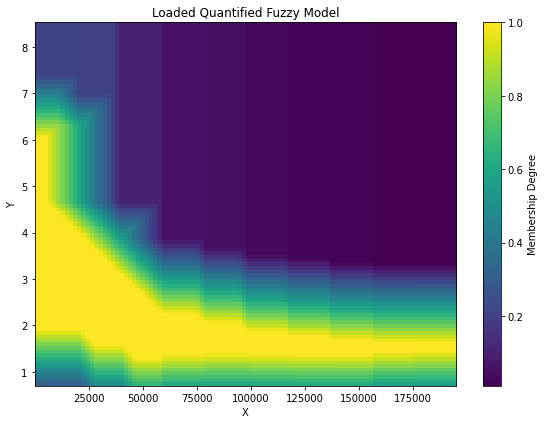

In [6]:
loaded_model=md.load_and_plot_QModel("my_model_model.pkl")